In [6]:
import os   # Import the os module to execute shell commands
import time # Import the time module to pause the execution of the script


for img in os.listdir(r"data\validation\images"):
    # Loop over all the images in the "data/validation/images" directory
    # and store the filename in the variable "img"

    os.popen(fr'python yolov5/detect.py --source "data\validation\images\{img}" --weights last_last.pt --conf 0.5 --save-txt --save-conf')
    # Execute the shell command to run the YOLOv5 model on the current image.
    # The "--source" argument specifies the input image file, "--weights" specifies
    # the pre-trained weights file, and "--conf" specifies the minimum confidence
    # threshold for the detected objects.

    time.sleep(4)
    # Pause the execution of the script for 6 seconds to allow time for the model
    # to detect objects in the current image.

    print(img, ' Done!')
    # Print a message to indicate that the detection for the current image is done.


CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.jpg  Done!
CabinCruiserOver5Kn-53352432-170c-40ed-bdd7-9d7415656eb8.jpg  Done!
CabinCruiserOver5Kn-6343927b-8313-4db4-94fa-8ecfbb183254.jpg  Done!
CabinCruiserOver5Kn-a5d31ba8-143c-4c64-8db7-28ecdfad59ca.jpg  Done!
CabinCruiserOver5Kn-ae0db5ed-0e70-4b1f-85f4-82a49c76d300.jpg  Done!
CabinCruiserOver5Kn-dfb3a301-4b49-40df-8056-c83fc770e9d2.jpg  Done!
CabinCruiserUnder5Kn-0217ee15-cb9b-4e05-b561-1efbb8a11232.jpg  Done!
CabinCruiserUnder5Kn-04906ed4-ca93-4348-9104-48319ac6f076.jpg  Done!
CabinCruiserUnder5Kn-0662ac66-25c0-47a9-b26e-3f51c8786a95.jpg  Done!
CabinCruiserUnder5Kn-08914d23-cddb-41a0-b760-c25dd0417650.jpg  Done!
CabinCruiserUnder5Kn-09e2380e-951b-47db-a55d-45d47fc3742f.jpg  Done!
CabinCruiserUnder5Kn-0d66c09d-a313-433c-8c5b-b59709a81014.jpg  Done!
CabinCruiserUnder5Kn-0ed3b8e5-ad7a-4c68-b95c-5627ae51544d.jpg  Done!
CabinCruiserUnder5Kn-0f150315-21a9-492d-8213-7f8657feb285.jpg  Done!
CabinCruiserUnder5Kn-1b3219dd-3784-4a8d-

In [14]:
class_dict = {'cabincruiser': 0,'halfcab':1, 'PWC': 2, 'kayak': 3, 'open':4}

In [146]:
import os

reallabelslst = [] # Initialize empty list to store labels.
detectpath = r'data/validation/labels/' # Set path to directory containing experiment folders.
for labelfile in os.listdir(detectpath): # Iterate over experiment folders.
    with open(os.path.join(detectpath,labelfile), 'r') as file: # Open each label file.
        for line in file: # Iterate over lines in the label file.
            if int(line.replace('\n','').split(' ')[0]) in class_dict.values(): # Check if the line contains a class ID that is present in the class dictionary.
                classlst = line.replace('\n','').split(' ')[:1]# Split the line into a list.
                classlst = [round(float(item),3) for item in classlst] # Convert each item in the list to a float and round to 1 decimal place.
                predclass = [name for name,number in class_dict.items() if number == int(line.replace('\n','').split(' ')[0])][0].lower()  # Get the predicted class name from the class dictionary.
                classlst.insert(0,labelfile.replace('.txt','.jpg')) # Add the image file name to the beginning of the list.
                classlst.insert(2, predclass) # Add the predicted class name to the list.
                reallabelslst.append(classlst) # Append the list to the label list.

reallabelslst[0]

['CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.jpg', 2.0, 'pwc']

In [147]:
len(reallabelslst)

451

In [148]:
labelslst = [] # Initialize empty list to store labels.
detectpath = r'yolov5/runs/detect' # Set path to directory containing experiment folders.
for expfolder in os.listdir(detectpath): # Iterate over experiment folders.
    for labelsfile in os.listdir(os.path.join(detectpath,expfolder,'labels')): # Iterate over label files in each experiment folder.
        with open(os.path.join(detectpath,expfolder,'labels',labelsfile), 'r') as file: # Open each label file.
            for line in file: # Iterate over lines in the label file.
                if int(line.replace('\n','').split(' ')[0]) in class_dict.values(): # Check if the line contains a class ID that is present in the class dictionary.
                    classlst = line.replace('\n','').split(' ')[:1] +  [line.replace('\n','').split(' ')[-1]] # Split the line into a list.
                    classlst = [round(float(item),3) for item in classlst] # Convert each item in the list to a float and round to 1 decimal place.
                    predclass = [name for name,number in class_dict.items() if number == int(line.replace('\n','').split(' ')[0])][0].lower()  # Get the predicted class name from the class dictionary.
                    classlst.insert(0,labelsfile.replace('.txt','.jpg')) # Add the image file name to the beginning of the list.
                    classlst.insert(2, predclass) # Add the predicted class name to the list.
                    labelslst.append(classlst) # Append the list to the label list.

labelslst[0]

['CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.jpg',
 2.0,
 'pwc',
 0.932]

In [149]:
len(labelslst)

462

In [150]:
def get_conf(lst,biglst):
    for lst_ in biglst:
        if lst == lst_[:-1]:
            return [lst_[-1]]

for idx,lst in enumerate(labelslst):
    for reidx,relst in enumerate(reallabelslst):
        if lst[0] == relst[0]:
            if lst[:-1] in reallabelslst:
                labelslst[idx] += labelslst[idx][1:-1]
                break
            else:
                labelslst[idx] += relst[1:]
                break

In [151]:
labelslst

[['CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.jpg',
  2.0,
  'pwc',
  0.932,
  2.0,
  'pwc'],
 ['CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.jpg',
  0.0,
  'cabincruiser',
  0.958,
  0.0,
  'cabincruiser'],
 ['CabinCruiserUnder5Kn-08914d23-cddb-41a0-b760-c25dd0417650.jpg',
  0.0,
  'cabincruiser',
  0.926,
  0.0,
  'cabincruiser'],
 ['CabinCruiserUnder5Kn-f992ea4c-d4e6-4c12-912a-4fde2b17a817.jpg',
  0.0,
  'cabincruiser',
  0.933,
  0.0,
  'cabincruiser'],
 ['CabinCruiserUnder5Kn-fbb00e6e-a322-4d17-a15a-0e149d3c9348.jpg',
  0.0,
  'cabincruiser',
  0.945,
  0.0,
  'cabincruiser'],
 ['CabinCruiserUnder5Kn-fe653d82-46ea-4ed4-9122-c1b0db287764.jpg',
  1.0,
  'halfcab',
  0.941,
  1.0,
  'halfcab'],
 ['CabinCruiserUnder5Kn-ff8d9d6b-ca95-4d1e-b51c-a452acbe84e9.jpg',
  0.0,
  'cabincruiser',
  0.961,
  0.0,
  'cabincruiser'],
 ['HalfCabOver5Kn-00433209-d0b6-4990-bbf6-3d267c7bdc79.jpg',
  1.0,
  'halfcab',
  0.918,
  1.0,
  'halfcab'],
 ['HalfCabOver5Kn-03b6df20-498

In [152]:
len(labelslst)

462

In [153]:
lst

['CabinCruiserUnder5Kn-f8a35c3b-73f8-40a6-b41b-ddc1f9e76f1b.jpg',
 0.0,
 'cabincruiser',
 0.956,
 0.0,
 'cabincruiser']

In [154]:
import pandas as pd  # Import the Pandas library

# Create a DataFrame from a list called `labelslst`, with specific column names
labelsdf = pd.DataFrame(labelslst, columns=['image_name','pred_class_number','pred_class_name','conf','real_class_number','real_class_name',])

labelsdf = labelsdf[labelsdf.conf != 'empty']
# Return the resulting DataFrame after removing duplicate rows
labelsdf

,image_name,pred_class_number,pred_class_name,conf,real_class_number,real_class_name
0,CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e4...,2.0,pwc,0.932,2.0,pwc
1,CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e4...,0.0,cabincruiser,0.958,0.0,cabincruiser
2,CabinCruiserUnder5Kn-08914d23-cddb-41a0-b760-c...,0.0,cabincruiser,0.926,0.0,cabincruiser
3,CabinCruiserUnder5Kn-f992ea4c-d4e6-4c12-912a-4...,0.0,cabincruiser,0.933,0.0,cabincruiser
4,CabinCruiserUnder5Kn-fbb00e6e-a322-4d17-a15a-0...,0.0,cabincruiser,0.945,0.0,cabincruiser
...,...,...,...,...,...,...
457,CabinCruiserUnder5Kn-f8289e62-65c2-478c-b3f2-4...,1.0,halfcab,0.595,1.0,halfcab
458,CabinCruiserUnder5Kn-f8289e62-65c2-478c-b3f2-4...,1.0,halfcab,0.896,1.0,halfcab
459,CabinCruiserUnder5Kn-f8289e62-65c2-478c-b3f2-4...,1.0,halfcab,0.910,1.0,halfcab
460,CabinCruiserUnder5Kn-f8a35c3b-73f8-40a6-b41b-d...,2.0,pwc,0.727,0.0,cabincruiser


In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall scores
acc = accuracy_score(labelsdf.real_class_name, labelsdf.pred_class_name) # Calculates the accuracy score of the model
pre = precision_score(labelsdf.real_class_name, labelsdf.pred_class_name, average='macro') # Calculates the macro-averaged precision score of the model
rec = recall_score(labelsdf.real_class_name, labelsdf.pred_class_name, average='macro') # Calculates the macro-averaged recall score of the model

print(f"""
accuracy = {round(acc*100,2)}%
precision = {round(pre*100,2)}%
recall = {round(rec*100,2)}%
""")


accuracy = 91.13%
precision = 91.65%
recall = 90.69%



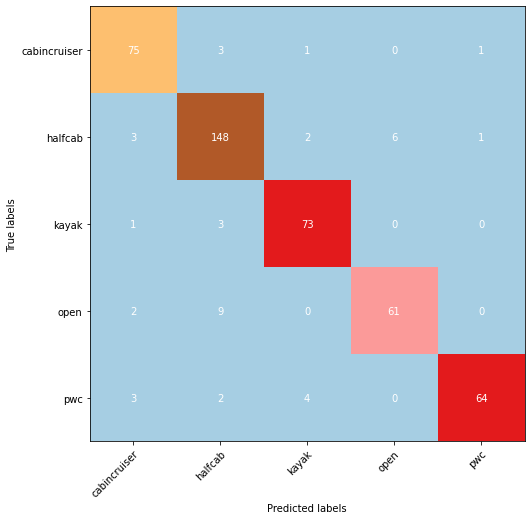

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true, y_pred = labelsdf.real_class_name, labelsdf.pred_class_name

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Paired')

# Add labels and ticks to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticks(np.arange(len(np.unique(y_true))))
ax.set_yticks(np.arange(len(np.unique(y_true))))
ax.set_xticklabels(np.unique(y_true))
ax.set_yticklabels(np.unique(y_true))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text to the plot
for i in range(len(np.unique(y_true))):
    for j in range(len(np.unique(y_true))):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")

# Display the plot
plt.show()

In [161]:
labelsdf.to_csv('testing_on_our_data.csv',index=False)